# Data Load

In [26]:
# Black Friday data set
    #Desc: Analytics Vidhya (also on Kaggle) competition set - some columns have masked values

#Potential Approaches: 
    #1) Predict checkout size
    #2) Predict age of customer/gender of customer
    #3) Predict product category of purchase

        
# Loading the data from a csv
import pandas as pd 

data = pd.read_csv("/Users/emag3/Documents/Code/Python/Black Friday Competition/BlackFriday.csv") 
# Preview the first 5 lines of the loaded data 
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
#(rows, columns)
data.shape

(537577, 12)

In [4]:
#dimensions
data.ndim

2

# Count NAs

In [5]:
def naCount(df):
    res = df.isnull().sum(axis = 0)
    print(res)
    
    
naCount(data)

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64


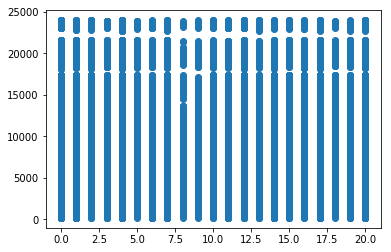

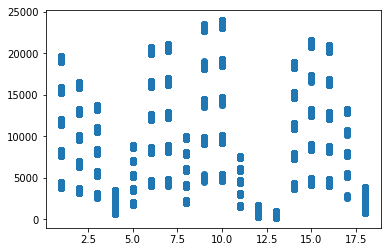

In [9]:
#todo: Make these actually useful, maybe use multithreading to speed up
# We have  alot of categorical data so probably bar plots, histograms, and box plots will be useful

import matplotlib.pyplot as plt
#for column in data:
 #   plt.scatter(data[column],data.Purchase)
 #  plt.show()
#^^too slow

plt.scatter(data.Occupation,data.Purchase)
plt.show()

plt.scatter(data.Product_Category_1,data.Purchase)
plt.show()

# Check/Remove Duplicates

In [10]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = data[data.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

#no duplicate rows

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [User_ID, Product_ID, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_1, Product_Category_2, Product_Category_3, Purchase]
Index: []


# Change Purchase to Dollars

In [24]:
#add new column
data['Purchase_Size']=data.Purchase/100
#check for new column in dollars
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Purchase_Size
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,83.70
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,152.00
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,14.22
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,10.57
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,79.69


# Scatterplot matrix

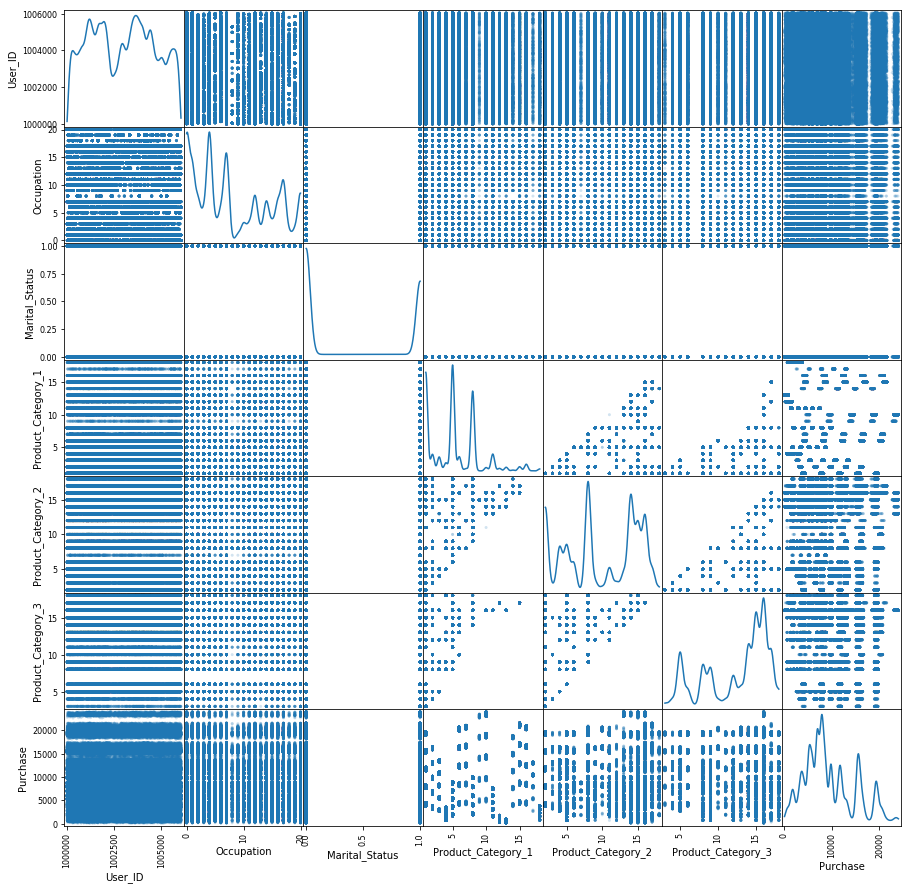

In [34]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

scatter_matrix(data, alpha=0.2, figsize=(15,15), diagonal='kde')
plt.show()

#not helpful and missing 6 columns